In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
holdout_df = pd.read_csv('cell2cellholdout.csv')
train_df = pd.read_csv('cell2celltrain.csv')

# Merge the datasets
merged_df = pd.concat([holdout_df, train_df], ignore_index=True)

# Save the merged dataset
merged_df.to_csv('cell2cell.csv', index=False)

In [3]:
telecom_data  = pd.read_csv("cell2celltrain.csv")

In [4]:
telecom_data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


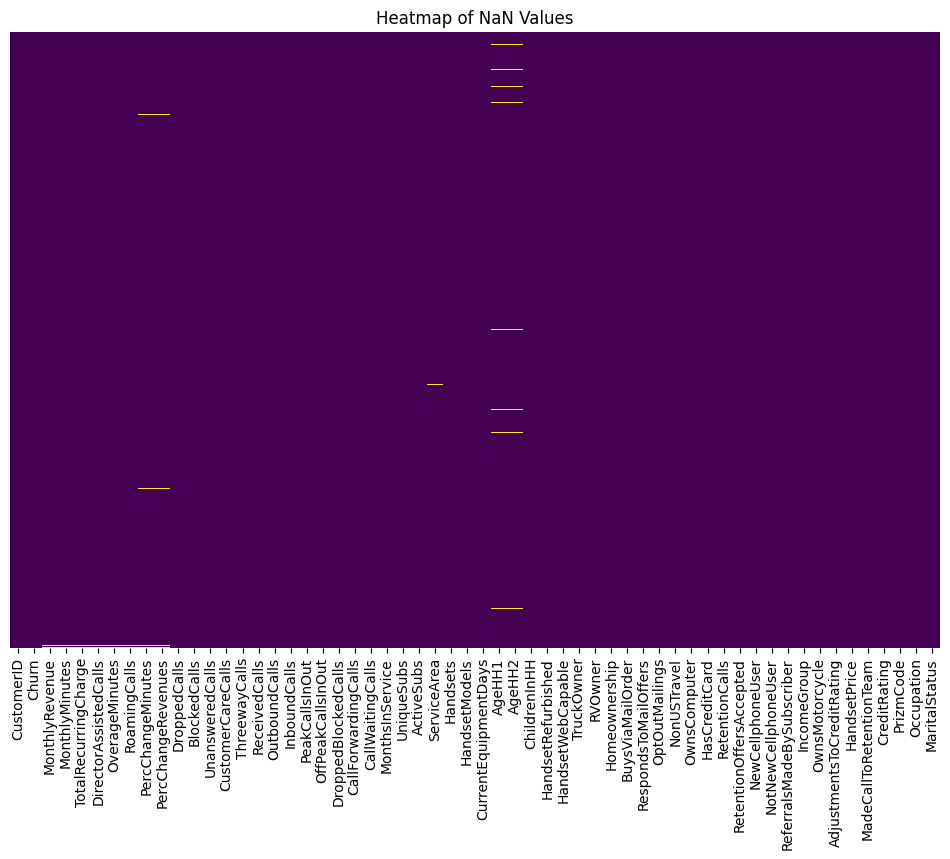

,Missing Values,Percentage
MonthlyRevenue,156,0.305601
MonthlyMinutes,156,0.305601
TotalRecurringCharge,156,0.305601
DirectorAssistedCalls,156,0.305601
OverageMinutes,156,0.305601
RoamingCalls,156,0.305601
PercChangeMinutes,367,0.718945
PercChangeRevenues,367,0.718945
ServiceArea,24,0.047015
Handsets,1,0.001959


In [5]:
# Check for nan values
import matplotlib.pyplot as plt
import seaborn as sns
# Checking for missing data numerically
missing_data = telecom_data.isna().sum()
missing_percentage = (missing_data / len(telecom_data)) * 100

# Displaying missing data summary
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]

# Plotting heatmap of NaN values (missing data)
plt.figure(figsize=(12, 8))
sns.heatmap(telecom_data.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of NaN Values")
plt.show()

missing_data_summary

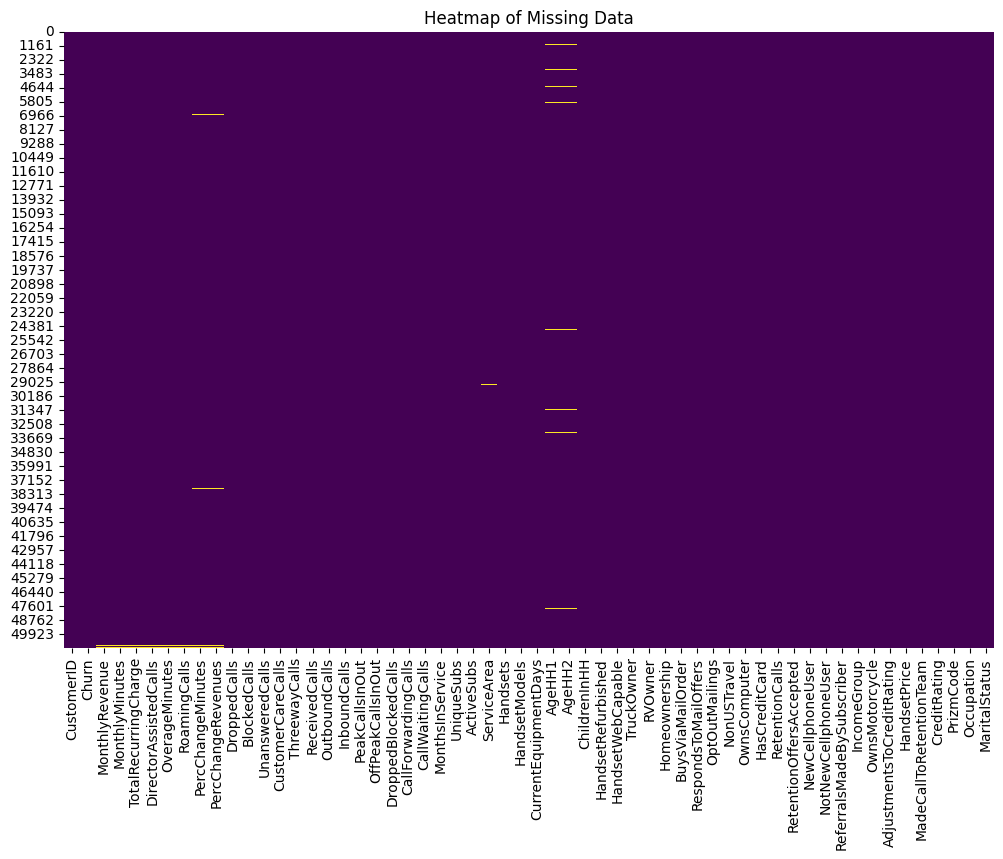

,Missing Values,Percentage
MonthlyRevenue,156,0.305601
MonthlyMinutes,156,0.305601
TotalRecurringCharge,156,0.305601
DirectorAssistedCalls,156,0.305601
OverageMinutes,156,0.305601
RoamingCalls,156,0.305601
PercChangeMinutes,367,0.718945
PercChangeRevenues,367,0.718945
ServiceArea,24,0.047015
Handsets,1,0.001959


In [6]:
# Check for missing data
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing data numerically
missing_data = telecom_data.isnull().sum()
missing_percentage = (missing_data / len(telecom_data)) * 100

# Displaying missing data summary
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]

# Plotting heatmap of missing data
plt.figure(figsize=(12, 8))
sns.heatmap(telecom_data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Data")
plt.show()

# Display missing data numerically
missing_data_summary


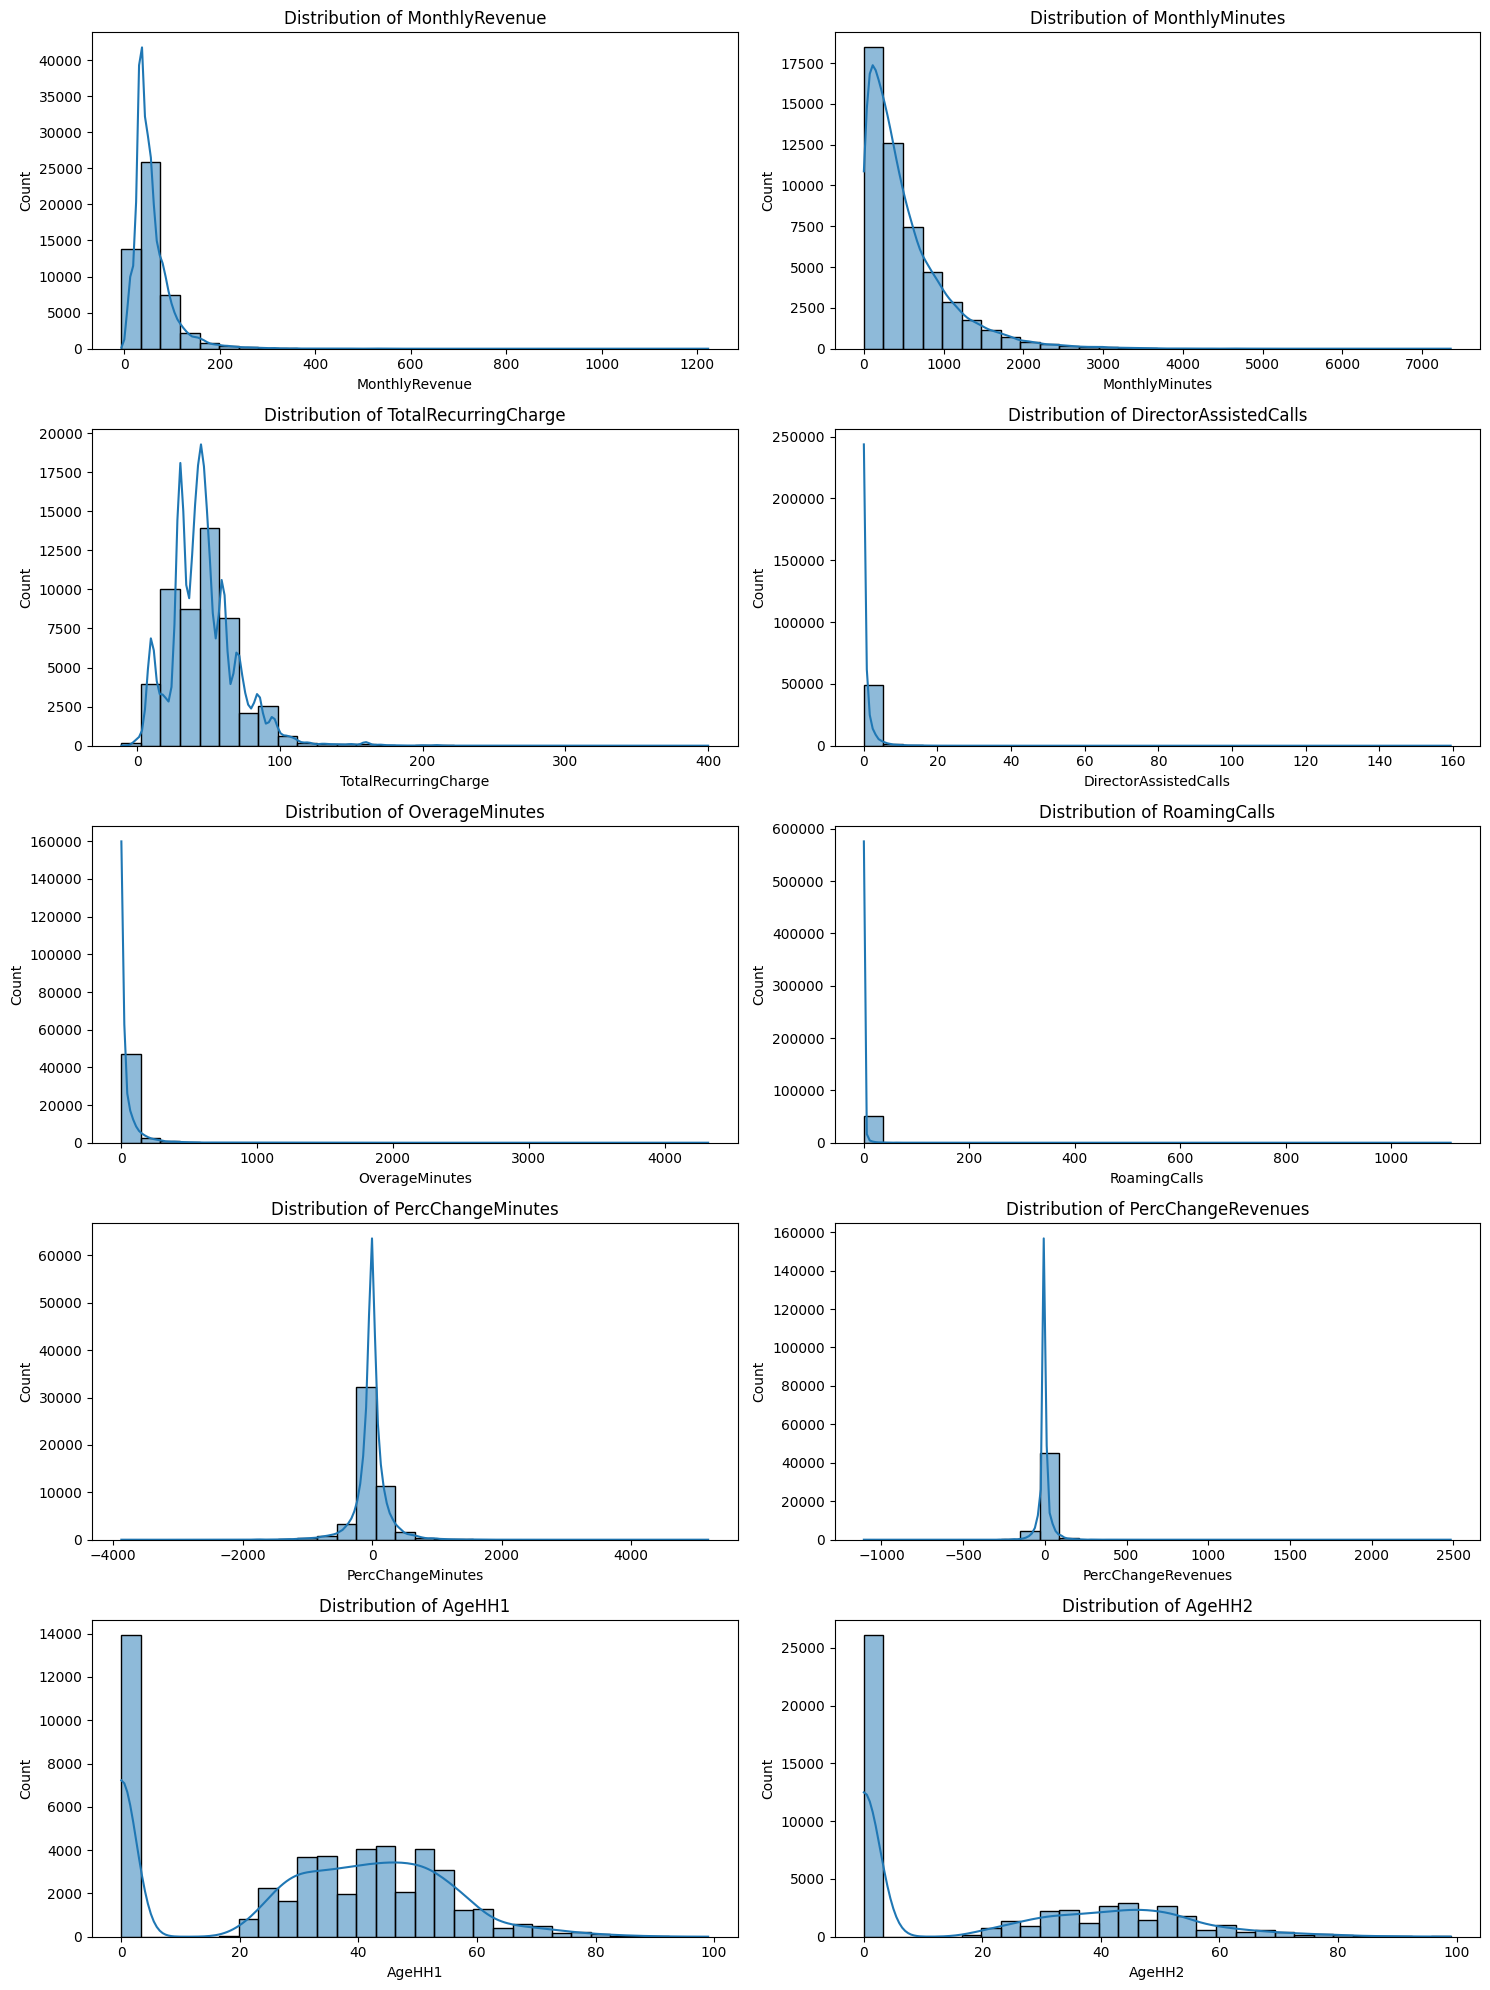

In [10]:
# Print the distribution
# Importing necessary libraries for plotting distributions
numerical_columns_with_missing = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 
                                  'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 
                                  'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2']

# Plotting distributions of numerical columns with missing values
plt.figure(figsize=(15, 20))

for i, column in enumerate(numerical_columns_with_missing, 1):
    plt.subplot(5, 2, i)
    sns.histplot(telecom_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


The distribution analysis of the numerical columns with missing values reveals several important patterns. For columns like MonthlyRevenue, MonthlyMinutes, and TotalRecurringCharge, the data is heavily skewed to the right, indicating that the majority of customers have relatively low values, with a few outliers showing much higher amounts. Similarly, columns such as DirectorAssistedCalls, OverageMinutes, and RoamingCalls are highly concentrated around zero, suggesting that most customers rarely use these services, with only a small number of individuals exhibiting much higher usage. In contrast, the columns PercChangeMinutes and PercChangeRevenues show sharp, narrow distributions with significant outliers, implying that most customers experience minor changes in usage and revenue, but a few have large fluctuations. Finally, the age-related columns, AgeHH1 and AgeHH2, follow a more normal distribution, though AgeHH2 (which could represent the second household member) is skewed towards younger ages. Given the presence of skewed distributions and outliers in most columns, median imputation is an appropriate choice to handle missing values, as it is more resistant to the effects of outliers compared to mean imputation. Therefore, proceeding with median imputation ensures the missing data is handled in a robust manner that aligns with the underlying distributions.

In [11]:
# Handling missing values in numerical columns using median imputation
# Selecting numerical columns with missing values
numerical_columns = telecom_data.select_dtypes(include=['float64', 'int64']).columns

# Imputing missing values with the median of each column
telecom_data[numerical_columns] = telecom_data[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Verifying if missing values have been handled
missing_data_after_imputation = telecom_data.isnull().sum()
missing_data_after_imputation[numerical_columns]


CustomerID                   0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
RetentionCalls               0
RetentionOffersAccepted      0
Referral

In [12]:
# For categorical columns:
# Selecting categorical columns and checking for missing values
categorical_columns = telecom_data.select_dtypes(include=['object','category']).columns
missing_categorical_data = telecom_data[categorical_columns].isnull().sum()
missing_categorical_data = missing_categorical_data[missing_categorical_data > 0]

# Display missing categorical data summary
missing_categorical_data


ServiceArea    24
dtype: int64

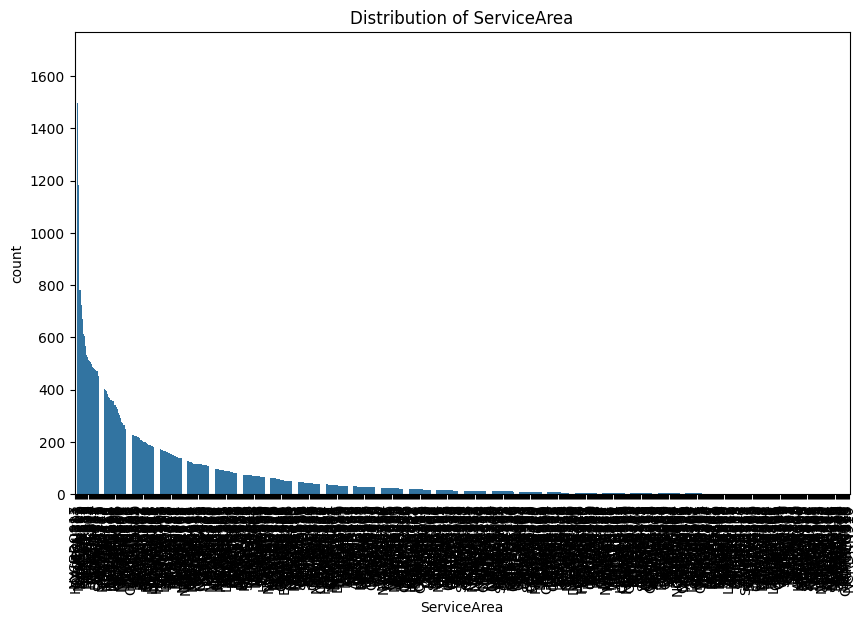

In [13]:
# Plotting the distribution of the 'ServiceArea' column to inspect its distribution before imputation
plt.figure(figsize=(10, 6))
sns.countplot(x=telecom_data['ServiceArea'], order=telecom_data['ServiceArea'].value_counts().index)
plt.title('Distribution of ServiceArea')
plt.xticks(rotation=90)
plt.show()


In [14]:
telecom_data.ServiceArea

0        SEAPOR503
1        PITHOM412
2        MILMIL414
3        PITHOM412
4        OKCTUL918
           ...    
51042    LAXSFN818
51043    LAXCDG310
51044    LAXCDG310
51045    NEVPOW619
51046    NEVPOW619
Name: ServiceArea, Length: 51047, dtype: object

Given the missing values in the ServiceArea column and the highly skewed distribution of the data, I have decided to drop the rows where the ServiceArea is missing. Since imputation of these values may not be logical without a clear basis for determining which area to assign to each missing entry, it could introduce inaccuracies or bias into the analysis. Moreover, because the number of missing values is relatively small (only 24 rows), dropping these records will have a minimal impact on the overall dataset. This approach ensures that we avoid any potential errors that could arise from incorrect imputation of this critical geographic variable.

In [15]:
# Dropping rows where 'ServiceArea' is missing
telecom_data_cleaned = telecom_data.dropna(subset=['ServiceArea'])

# Verifying if any missing values remain in 'ServiceArea'
telecom_data_cleaned['ServiceArea'].isnull().sum()


0

In [16]:
# Checking for any remaining missing values in the entire dataset
missing_data_overall = telecom_data_cleaned.isnull().sum()
missing_data_overall[missing_data_overall > 0]


Series([], dtype: int64)

In [17]:
telecom_data_cleaned['Churn']

0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
51042    Yes
51043     No
51044    Yes
51045     No
51046     No
Name: Churn, Length: 51023, dtype: object

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10792\2444200384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_data_cleaned['Churn'] = telecom_data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


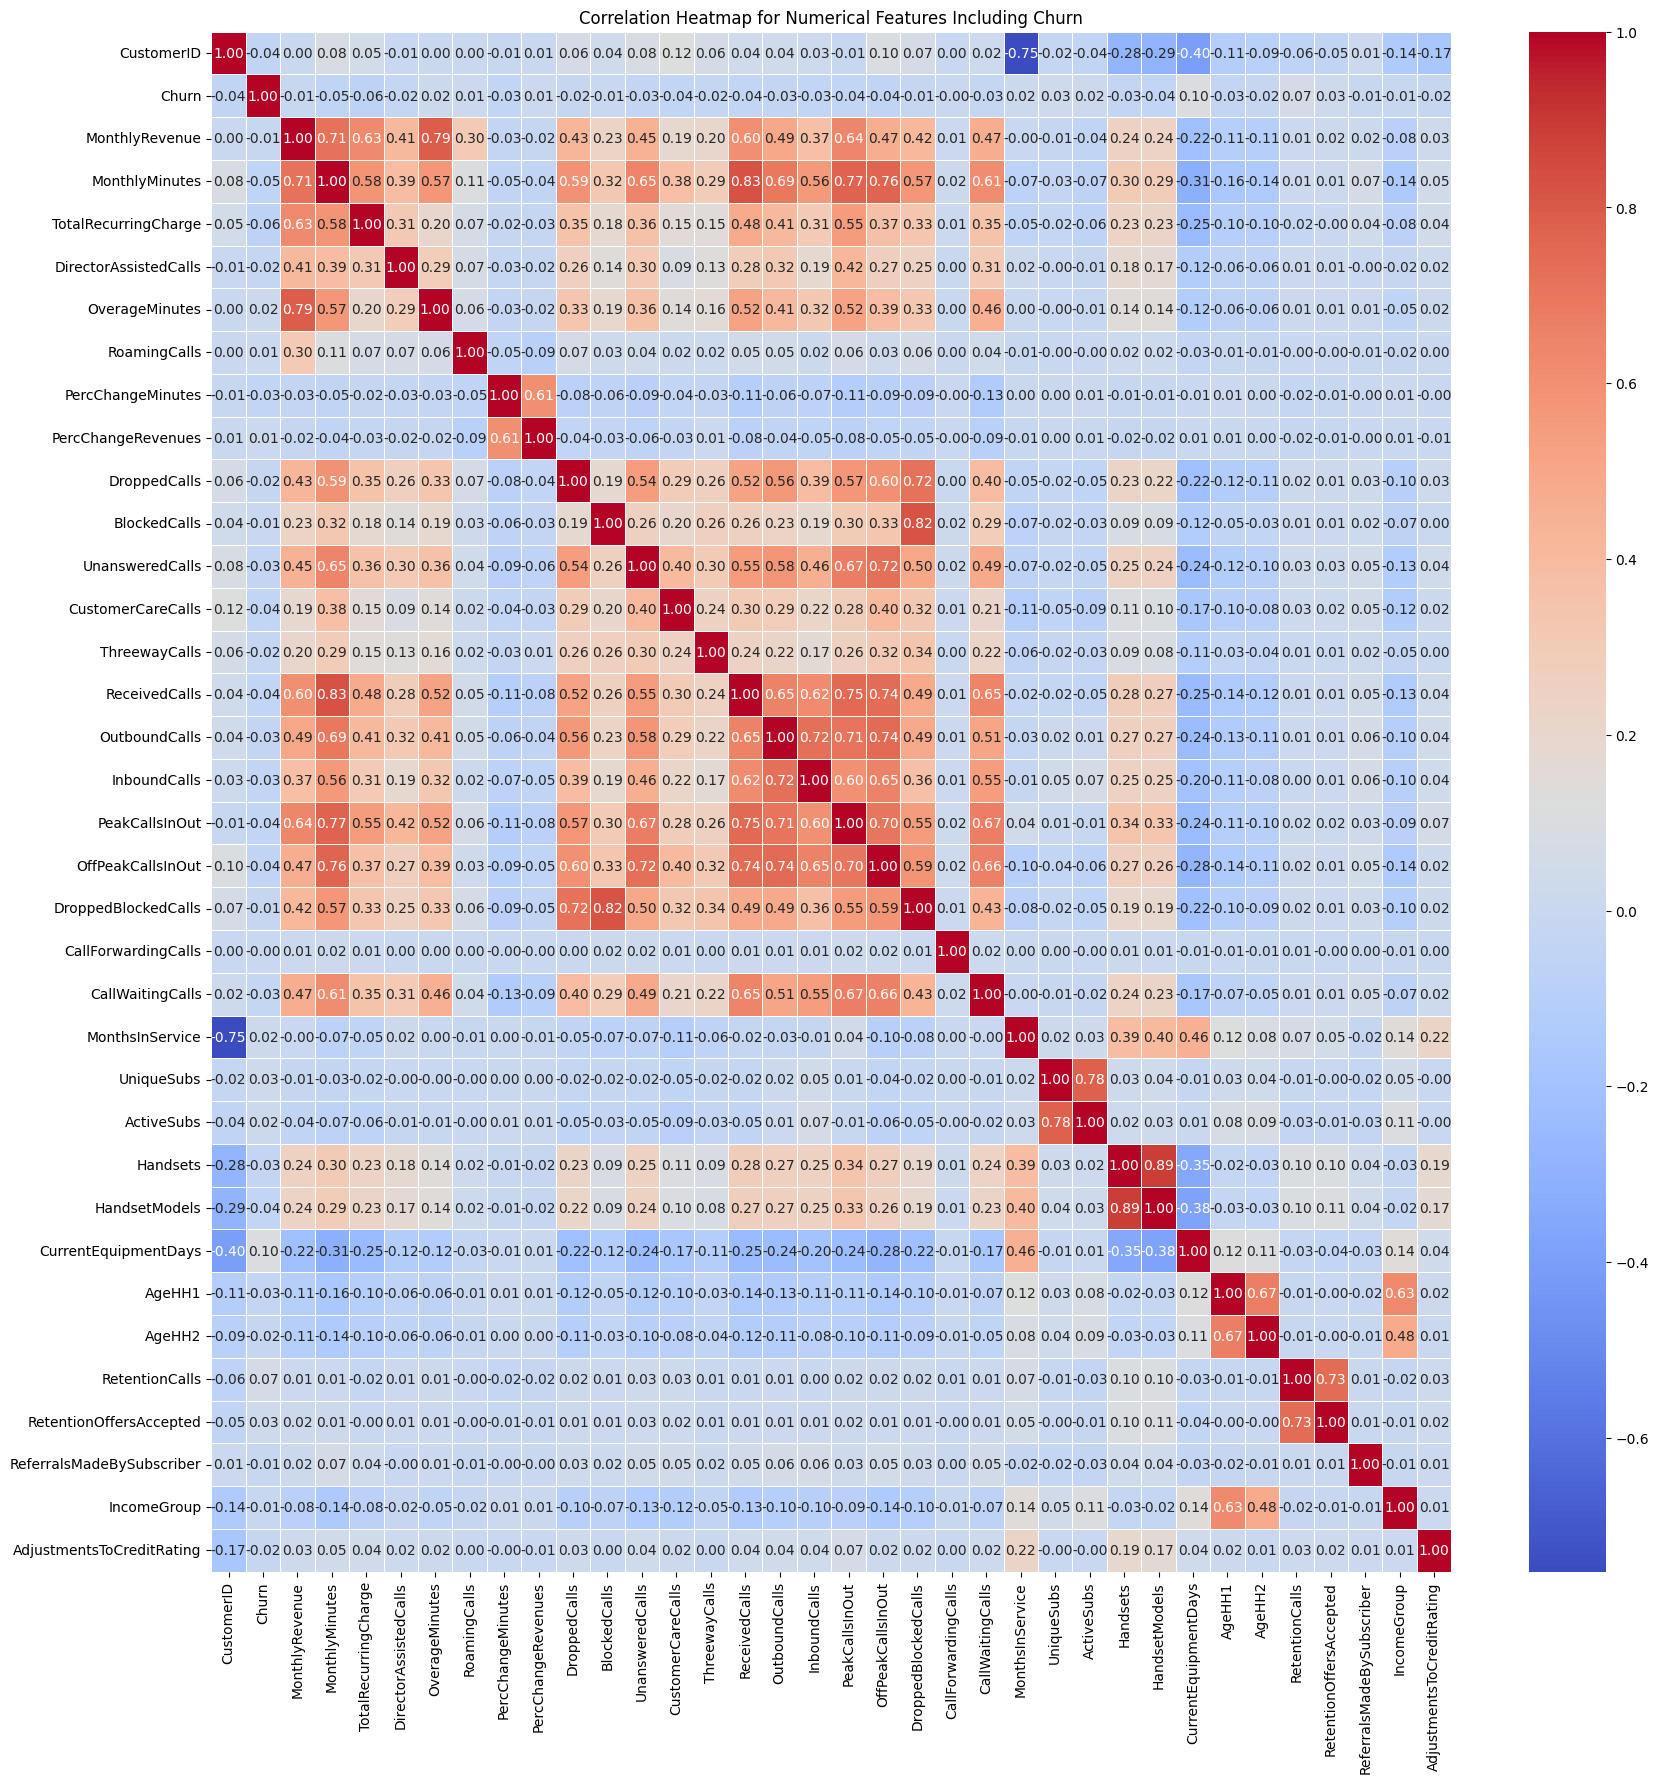

In [18]:
# Encoding the 'Churn' column to perform correlation analysis (Yes=1, No=0)
telecom_data_cleaned['Churn'] = telecom_data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Selecting only the numerical columns for correlation analysis
numerical_data = telecom_data_cleaned.select_dtypes(include=['float64', 'int64','int32'])

# Adding the encoded churn column to the numerical data
numerical_data['Churn'] = telecom_data_cleaned['Churn']

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Extracting correlation values with 'Churn_Encoded'
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)

# Displaying the correlations with 'Churn_Encoded'

# Plotting a heatmap for the correlation matrix including 'Churn_Encoded'
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features Including Churn")
plt.show()


The overall weak correlations imply that churn is not driven by any single numerical factor. Instead, churn behavior is likely influenced by a combination of small effects from various features or non-numerical aspects, such as customer behavior, satisfaction, or external factors not captured by the numerical data.

identify and visualize the highly correlated features in the dataset and suggest which ones can be dropped or combined. 

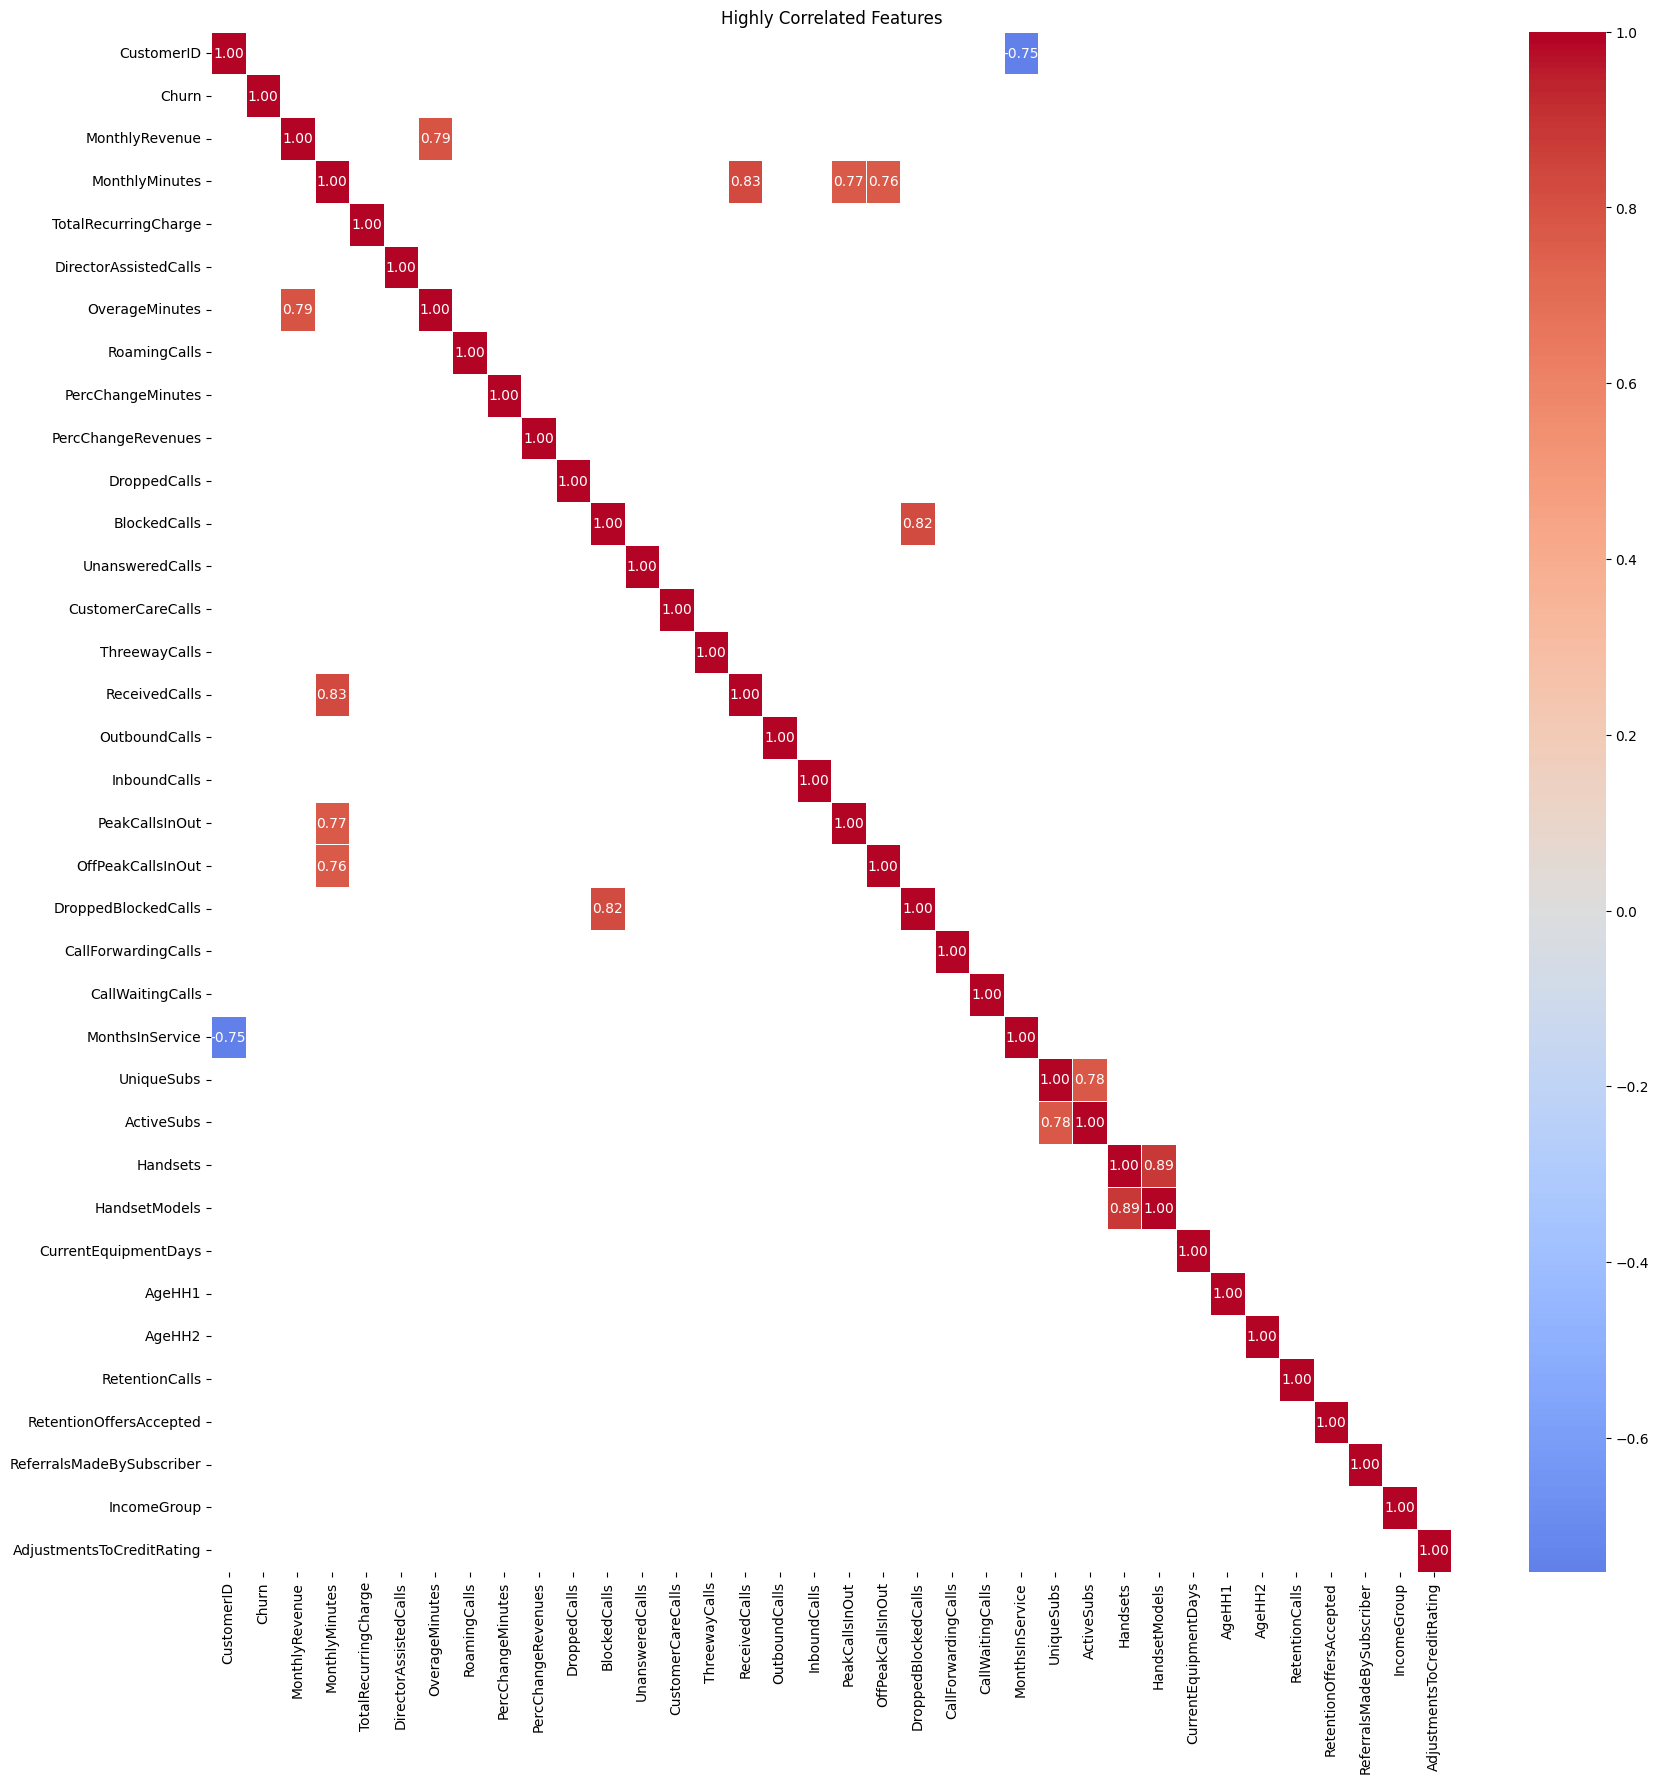

In [19]:
# Visualizing highly correlated features in the dataset
import numpy as np
# First, setting a correlation threshold (e.g., above 0.8 or below -0.8) for high correlations
correlation_threshold = 0.75

# Extracting the correlation matrix for the numerical data
correlation_matrix = numerical_data.corr()

# Masking the correlation matrix lower triangle and filtering for highly correlated features
high_correlation = correlation_matrix[(correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)]

# Visualizing only the highly correlated features
plt.figure(figsize=(20, 20))
sns.heatmap(high_correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Highly Correlated Features")
plt.show()



In [89]:
!python -m pip install ace_tools

You should consider upgrading via the 'c:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [20]:
# Creating a matrix for highly correlated pairs based on the threshold (0.75)
correlation_threshold = 0.75
highly_correlated_matrix = correlation_matrix[(correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)]

# Removing self-correlations (correlation of a feature with itself)
highly_correlated_matrix = highly_correlated_matrix.where(np.triu(np.ones(highly_correlated_matrix.shape), k=1).astype(bool))

# Displaying the highly correlated matrix as a table format
highly_correlated_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)  # Removing rows and columns with all NaN values



,OverageMinutes,ReceivedCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,MonthsInService,ActiveSubs,HandsetModels
CustomerID,NaN,NaN,NaN,NaN,NaN,-0.752286,NaN,NaN
MonthlyRevenue,0.787854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyMinutes,NaN,0.828008,0.77034,0.763835,NaN,NaN,NaN,NaN
BlockedCalls,NaN,NaN,NaN,NaN,0.816267,NaN,NaN,NaN
UniqueSubs,NaN,NaN,NaN,NaN,NaN,NaN,0.775716,NaN
Handsets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887848


In [21]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Set a correlation threshold (e.g., 0.75)
correlation_threshold = 0.75

# Identify highly correlated pairs
highly_correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)
highly_correlated_pairs = highly_correlated_pairs[(highly_correlated_pairs > correlation_threshold) & (highly_correlated_pairs < 1)]

# Display the results
print(highly_correlated_pairs)


HandsetModels        Handsets               0.887848
Handsets             HandsetModels          0.887848
MonthlyMinutes       ReceivedCalls          0.828008
ReceivedCalls        MonthlyMinutes         0.828008
BlockedCalls         DroppedBlockedCalls    0.816267
DroppedBlockedCalls  BlockedCalls           0.816267
MonthlyRevenue       OverageMinutes         0.787854
OverageMinutes       MonthlyRevenue         0.787854
UniqueSubs           ActiveSubs             0.775716
ActiveSubs           UniqueSubs             0.775716
MonthlyMinutes       PeakCallsInOut         0.770340
PeakCallsInOut       MonthlyMinutes         0.770340
OffPeakCallsInOut    MonthlyMinutes         0.763835
MonthlyMinutes       OffPeakCallsInOut      0.763835
dtype: float64


The dataset contains several highly correlated feature pairs, which indicates redundancy in the information they provide. For example, MonthlyRevenue and OverageMinutes have a correlation of 0.79, suggesting that customers with higher overage minutes also tend to spend more. Similarly, MonthlyMinutes is highly correlated with both ReceivedCalls (0.83) and PeakCallsInOut (0.77), indicating overlapping information about customer usage. Features like BlockedCalls and DroppedBlockedCalls (0.82), UniqueSubs and ActiveSubs (0.78), as well as Handsets and HandsetModels (0.89), also show strong correlations.

To avoid redundancy and multicollinearity in any further analysis, we recommend dropping one feature from each highly correlated pair. Specifically, OverageMinutes, ReceivedCalls, PeakCallsInOut, DroppedBlockedCalls, UniqueSubs, and HandsetModels can be dropped, as their corresponding highly correlated counterparts (e.g., MonthlyRevenue, MonthlyMinutes, BlockedCalls, ActiveSubs, and Handsets) already capture the necessary information. Additionally, since CustomerID is simply an identifier with no analytical value, it should be removed. By doing so, the dataset will become more streamlined, reducing complexity without losing key insights.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10792\4133013799.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10792\4133013799.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10792\4133013799.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykerne

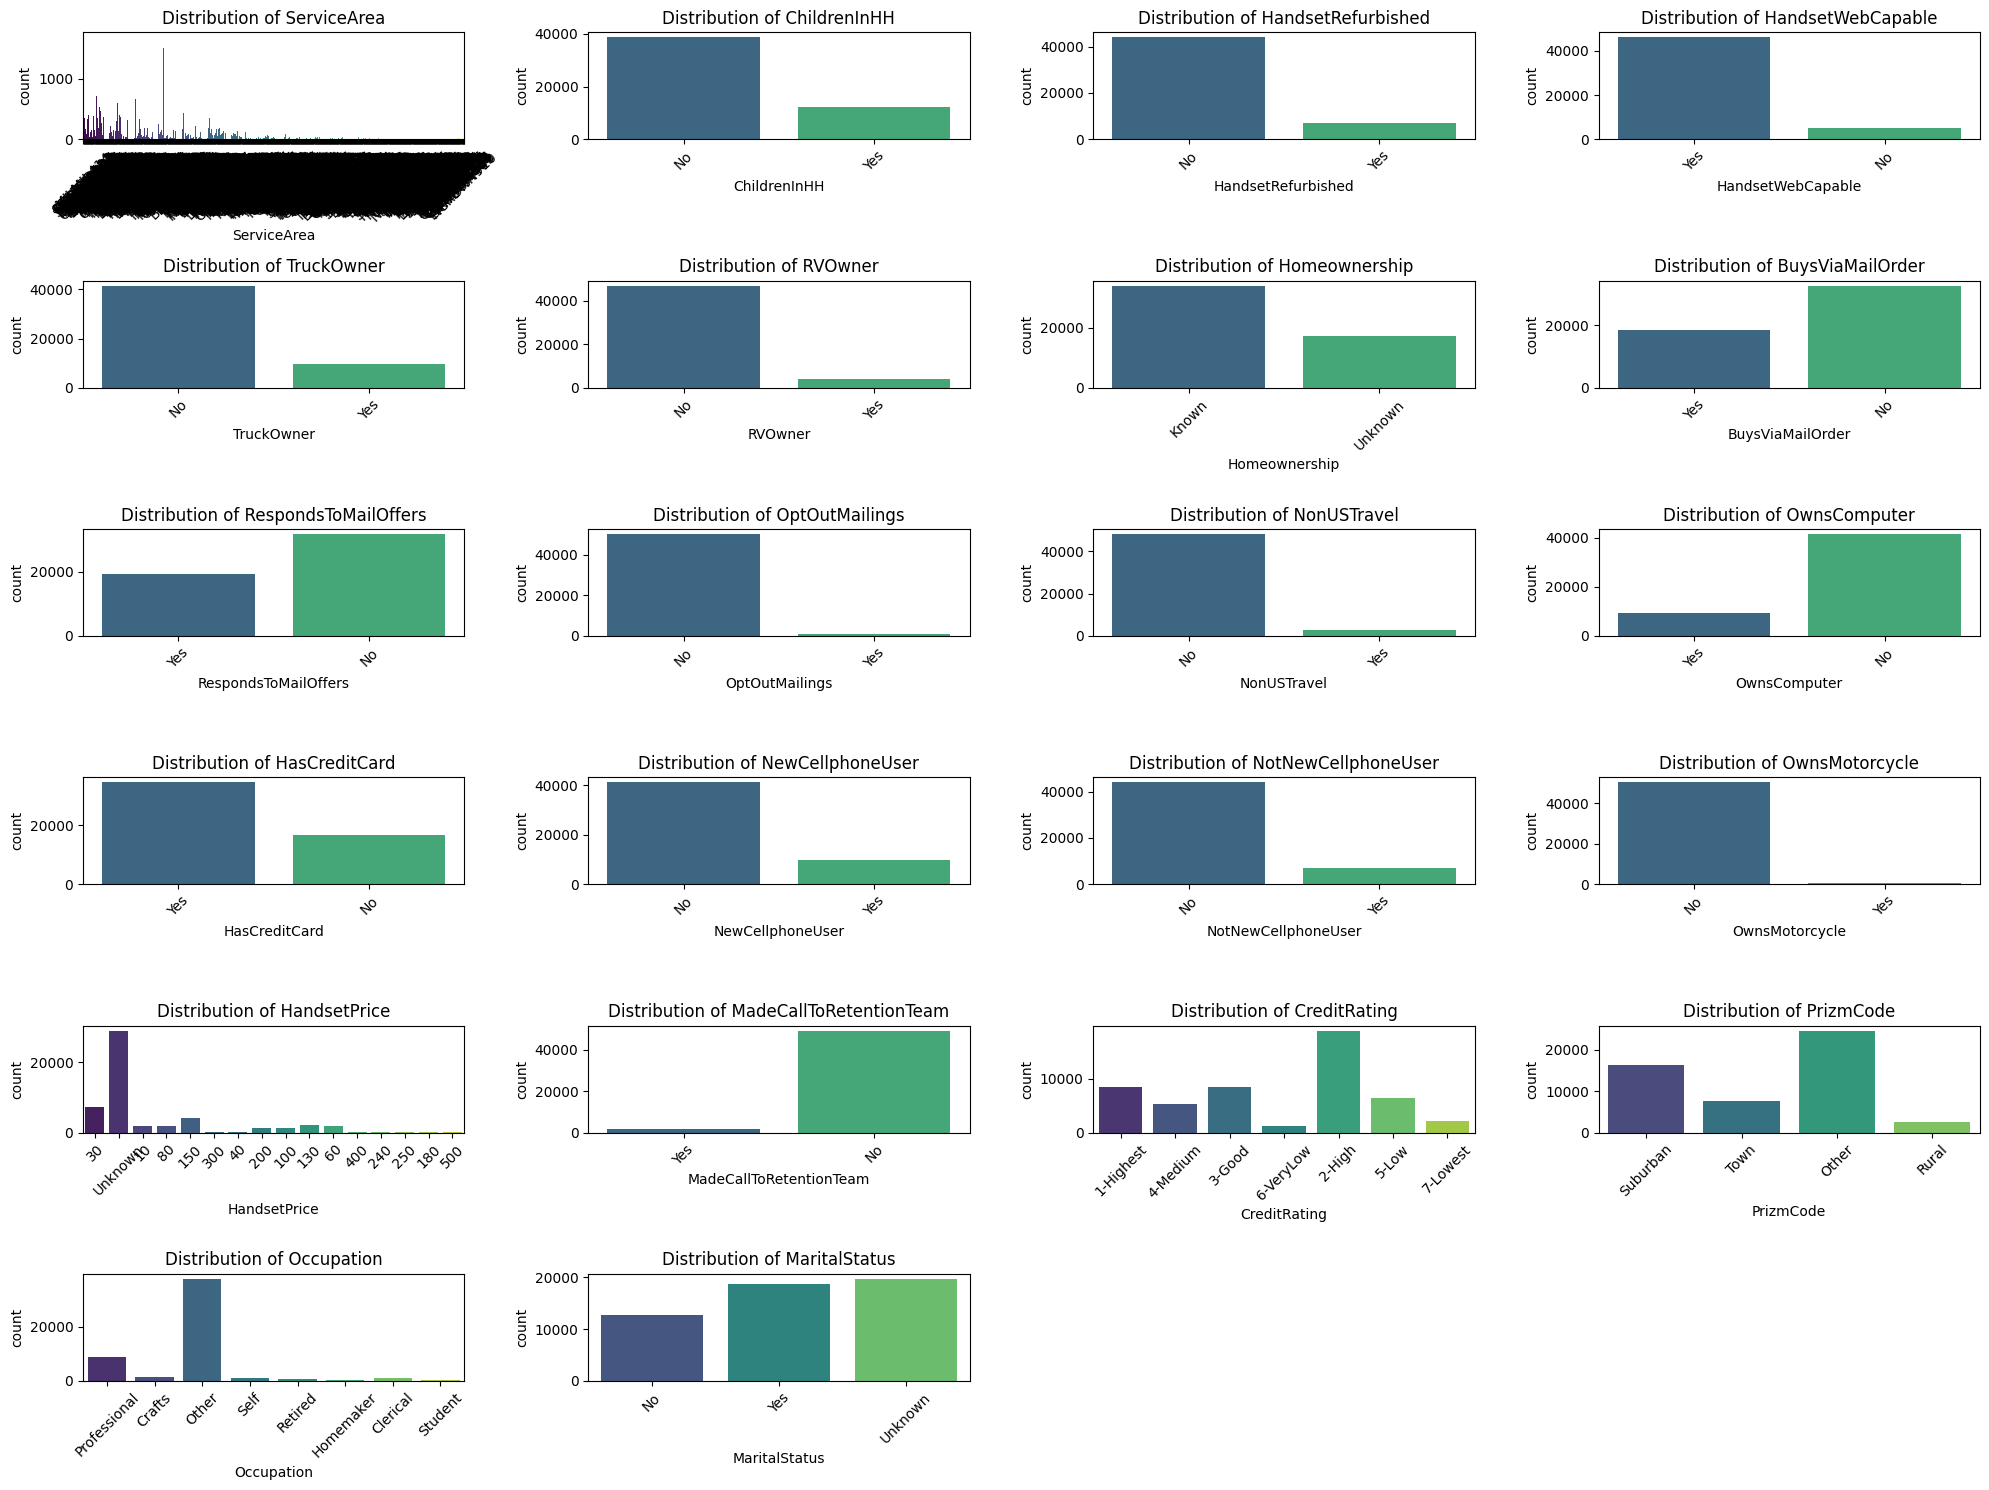

In [22]:
# Extracting categorical columns from the dataset
categorical_columns = telecom_data_cleaned.select_dtypes(include=['object']).columns

# Plotting the distribution of each categorical column
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size for better visibility
plt.figure(figsize=(20, 15))

# Plotting each categorical column's distribution
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 4, i)
    sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Selecting categorical columns
categorical_columns = telecom_data_cleaned.select_dtypes(include=['object']).columns

# Initializing LabelEncoder for encoding categorical data
label_encoder = LabelEncoder()

# Creating a DataFrame to store the chi-square results
chi2_results = []

# Looping through each categorical column to perform chi-square test
for column in categorical_columns:
    # Encoding the categorical column for chi-square test
    telecom_data_cleaned[column] = label_encoder.fit_transform(telecom_data_cleaned[column].astype(str))
    
    # Creating a contingency table for chi-square test between the column and 'Churn_Encoded'
    contingency_table = pd.crosstab(telecom_data_cleaned[column], telecom_data_cleaned['Churn'])
    
    # Performing the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Storing the results
    chi2_results.append((column, chi2, p))

# Converting the results to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results, columns=['Column', 'Chi2', 'P-Value'])

# Sorting by P-Value to see significance
chi2_results_df = chi2_results_df.sort_values(by='P-Value')

# Displaying the chi-square results
chi2_results_df


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10792\2232288330.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_data_cleaned[column] = label_encoder.fit_transform(telecom_data_cleaned[column].astype(str))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10792\2232288330.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_data_cleaned[column] = label_encoder.fit_transform(telecom_data_cleaned[column].astype(str))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10792\2232288330.py:16: SettingWith

,Column,Chi2,P-Value
17,MadeCallToRetentionTeam,230.328611,5.054501e-52
3,HandsetWebCapable,197.485518,7.388652e-45
18,CreditRating,213.755820,2.230416e-43
2,HandsetRefurbished,45.194898,1.783691e-11
16,HandsetPrice,70.714644,3.331128e-09
21,MaritalStatus,36.965316,9.399043e-09
0,ServiceArea,959.134195,1.862609e-07
8,RespondsToMailOffers,26.630635,2.463072e-07
7,BuysViaMailOrder,23.952641,9.873477e-07
19,PrizmCode,18.858659,2.924261e-04


Based on the chi-square test results, we can make decisions on which categorical features to retain and which to drop for further analysis. Features with very low p-values, such as MadeCallToRetentionTeam, HandsetWebCapable, CreditRating, HandsetRefurbished, HandsetPrice, ServiceArea, MaritalStatus, RespondsToMailOffers, BuysViaMailOrder, and PrizmCode, are strongly associated with churn and should be kept, as they are likely to provide valuable insights for predictive modeling. These features have a significant relationship with churn and could be crucial in understanding customer behavior. On the other hand, features with high p-values, such as OptOutMailings, OwnsComputer, NonUSTravel, RVOwner, and TruckOwner, show no significant association with churn and can be safely dropped as they are unlikely to contribute meaningfully to the analysis. Features like Occupation, NotNewCellphoneUser, OwnsMotorcycle, NewCellphoneUser, HasCreditCard, ChildrenInHH, and Homeownership have weaker associations with churn, but may still be relevant for further investigation or could be dropped if a simpler model is preferred. Marginally significant features such as ChildrenInHH and HasCreditCard might require further analysis, but could also be retained if there’s a logical business reason to keep them. In summary, highly significant features should be prioritized for retention, while those with weak or no significance should be dropped to streamline the dataset for further analysis or modeling.

In [24]:
# Drop columns
columns_to_drop = [
    'OptOutMailings', 'OwnsComputer', 'NonUSTravel', 
    'RVOwner', 'TruckOwner', 'Occupation', 'NotNewCellphoneUser', 
    'OwnsMotorcycle', 'NewCellphoneUser'
]
telecom_data_cleaned = telecom_data_cleaned.drop(columns=columns_to_drop)


In [47]:
# Initialize an empty list to store binary columns
binary_columns = []

# Iterate through all object (categorical) columns to find binary columns
for col in telecom_data_cleaned.select_dtypes(include=['object']).columns:
    unique_values = sorted(telecom_data_cleaned[col].dropna().unique())
    if unique_values == ['No', 'Yes'] or unique_values == ['Known', 'Unknown']:
        binary_columns.append(col)

# Apply binary encoding (Yes -> 1, No -> 0, Known -> 1, Unknown -> 0) to those columns
for col in binary_columns:
    telecom_data_cleaned[col] = telecom_data_cleaned[col].map({'Yes': 1, 'No': 0, 'Known': 1, 'Unknown': 0})

# Output the list of binary columns identified and encoded
print("Binary columns encoded:", binary_columns)


Binary columns encoded: []


In [25]:
telecom_data_cleaned["Churn"]

0        1
1        1
2        0
3        0
4        1
        ..
51042    1
51043    0
51044    1
51045    0
51046    0
Name: Churn, Length: 51023, dtype: int64

In [26]:
telecom_data_cleaned.ServiceArea

0        658
1        610
2        352
3        610
4        563
        ... 
51042    310
51043    288
51044    288
51045    411
51046    411
Name: ServiceArea, Length: 51023, dtype: int32

In [27]:
telecom_data_cleaned.dtypes

CustomerID                     int64
Churn                          int64
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                    int32
H

In [28]:
columns = telecom_data_cleaned.columns

In [29]:
columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating',
       'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode',
       'Mar

In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume 'telecom_data_cleaned' is your original DataFrame

# Step 1: Exclude 'Churn' from the numerical columns to scale
numerical_columns = telecom_data_cleaned.select_dtypes(include=['float64', 'int64','int32']).columns
numerical_columns = numerical_columns.drop('Churn', errors='ignore')  # Exclude 'Churn' from the scaling

# Step 2: Initialize the scaler
scaler = StandardScaler()

# Step 3: Apply the scaler only to the selected numerical columns
df_scaled = pd.DataFrame(scaler.fit_transform(telecom_data_cleaned[numerical_columns]), columns=numerical_columns)

# Step 4: Concatenate the scaled numerical columns with the unscaled 'Churn' column and others
telecom_data_cleaned_scaled = pd.concat([df_scaled, telecom_data_cleaned['Churn']], axis=1)

# Step 5: Display the first few rows of the resulting DataFrame
print(telecom_data_cleaned_scaled.head())


   CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0   -1.727603       -0.783000       -0.578517             -1.042490   
1   -1.727535       -0.940726       -0.973505             -1.252463   
2   -1.727501       -0.467999       -0.977285             -0.370578   
3   -1.727432        0.528304        1.487138              1.183220   
4   -1.727398       -0.937351       -0.992404             -1.252463   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0              -0.288988       -0.413681      -0.12571          -0.566898   
1              -0.401336       -0.413681      -0.12571           0.029361   
2              -0.401336       -0.413681      -0.12571           0.037155   
3               0.155912       -0.413681      -0.12571           0.656798   
4              -0.401336       -0.413681      -0.12571           0.044950   

   PercChangeRevenues  DroppedCalls  ...  RetentionOffersAccepted  \
0           -0.451595     -0.587190  ... 

In [31]:
telecom_data_cleaned_scaled.Churn

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
51042    1.0
51043    0.0
51044    1.0
51045    0.0
51046    0.0
Name: Churn, Length: 51047, dtype: float64

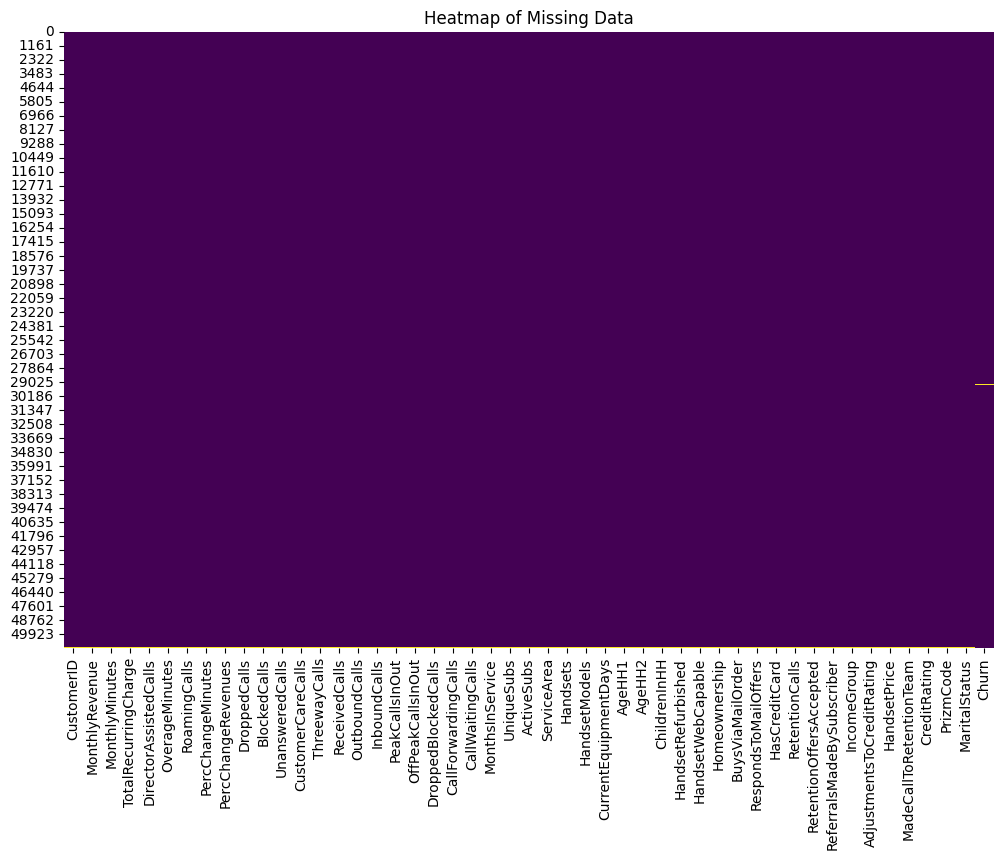

,Missing Values,Percentage
CustomerID,24,0.047015
MonthlyRevenue,24,0.047015
MonthlyMinutes,24,0.047015
TotalRecurringCharge,24,0.047015
DirectorAssistedCalls,24,0.047015
OverageMinutes,24,0.047015
RoamingCalls,24,0.047015
PercChangeMinutes,24,0.047015
PercChangeRevenues,24,0.047015
DroppedCalls,24,0.047015


In [32]:
# Check for missing data
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing data numerically
missing_data = telecom_data_cleaned_scaled.isnull().sum()
missing_percentage = (missing_data / len(telecom_data_cleaned_scaled)) * 100

# Displaying missing data summary
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]

# Plotting heatmap of missing data
plt.figure(figsize=(12, 8))
sns.heatmap(telecom_data_cleaned_scaled.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Data")
plt.show()

# Display missing data numerically
missing_data_summary


In [33]:
# Drop rows with any missing (NaN) values
telecom_data_cleaned_scaled = telecom_data_cleaned_scaled.dropna()

# Display the cleaned DataFrame (with no missing records)
print(telecom_data_cleaned_scaled.head())


   CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0   -1.727603       -0.783000       -0.578517             -1.042490   
1   -1.727535       -0.940726       -0.973505             -1.252463   
2   -1.727501       -0.467999       -0.977285             -0.370578   
3   -1.727432        0.528304        1.487138              1.183220   
4   -1.727398       -0.937351       -0.992404             -1.252463   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0              -0.288988       -0.413681      -0.12571          -0.566898   
1              -0.401336       -0.413681      -0.12571           0.029361   
2              -0.401336       -0.413681      -0.12571           0.037155   
3               0.155912       -0.413681      -0.12571           0.656798   
4              -0.401336       -0.413681      -0.12571           0.044950   

   PercChangeRevenues  DroppedCalls  ...  RetentionOffersAccepted  \
0           -0.451595     -0.587190  ... 

In [34]:
telecom_data_cleaned_scaled.to_csv("cell2cell_preprocess.csv", index=False)

In [35]:
# Check for NaN values in the entire DataFrame
nan_values = telecom_data_cleaned_scaled.isna().sum()

# Display columns with NaN values (if any)
print(nan_values[nan_values > 0])


Series([], dtype: int64)


In [90]:
!python -m pip install imblearn

You should consider upgrading via the 'c:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Try XGBoost Focal Loss

In [92]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Separate features (X) and target (y)
X = telecom_data_cleaned_scaled.drop(columns=['Churn'])
y = telecom_data_cleaned_scaled['Churn']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Define the hyperparameter grid for XGBoost
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 0.1, 0.01]
}

# Step 5: Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Step 6: Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=20, 
                                   scoring='accuracy', cv=3, random_state=42, n_jobs=-1)

# Step 7: Fit RandomizedSearchCV to the SMOTE training data
random_search.fit(X_train_smote, y_train_smote)

# Step 8: Print the best parameters from the randomized search
print("Best Parameters:", random_search.best_params_)

# Step 9: Train the final model with the best parameters
best_xgb_model = random_search.best_estimator_

# Step 10: Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Step 11: Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [20:44:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}
Accuracy: 0.7047058823529412
Confusion Matrix:
[[7177   11]
 [3001   11]]


In [37]:
import time
import math
import scipy
import random
import numpy as np
import xgboost as xgb
from numpy import matlib
import sklearn as sk
from sklearn import linear_model
#import sklearn-based class to perform pipeline process
from sklearn.base import BaseEstimator, ClassifierMixin
import collections

def weighted_binary_cross_entropy(pred,dtrain,imbalance_alpha=5.0):
    # retrieve data from dtrain matrix
    label = dtrain.get_label()
    # compute the prediction with sigmoid
    sigmoid_pred = 1.0 / (1.0 + np.exp(-pred))
    # gradient
    grad = -(imbalance_alpha**label)*(label - sigmoid_pred)
    hess = (imbalance_alpha**label)*sigmoid_pred*(1.0 - sigmoid_pred)
    
    return grad, hess

def focal_binary_object(pred,dtrain,gamma_indct=1.2):
    # retrieve data from dtrain matrix
    label = dtrain.get_label()
    # compute the prediction with sigmoid
    sigmoid_pred = 1.0 / (1.0 + np.exp(-pred))
    # gradient
    # complex gradient with different parts
    grad_first_part = (label+((-1)**label)*sigmoid_pred)**gamma_indct
    grad_second_part = label - sigmoid_pred
    grad_third_part = gamma_indct*(1-label-sigmoid_pred)
    grad_log_part = np.log(1-label-((-1)**label)*sigmoid_pred + 1e-7)       # add a small number to avoid numerical instability
    # combine the gradient
    grad = -grad_first_part*(grad_second_part+grad_third_part*grad_log_part)
    # combine the gradient parts to get hessian
    hess_first_term = gamma_indct*(label+((-1)**label)*sigmoid_pred)**(gamma_indct-1)*sigmoid_pred*(1.0 - sigmoid_pred)*(grad_second_part+grad_third_part*grad_log_part)
    hess_second_term = (-sigmoid_pred*(1.0 - sigmoid_pred)-gamma_indct*sigmoid_pred*(1.0 - sigmoid_pred)*grad_log_part-((1/(1-label-((-1)**label)*sigmoid_pred))*sigmoid_pred*(1.0 - sigmoid_pred)))*grad_first_part
    # get the final 2nd order derivative
    hess = -(hess_first_term+hess_second_term)
    
    return grad, hess

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    # return a pair metric_name, result
    # since preds are margin(before logistic transformation, cutoff at 0)
    
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)

def two_class_encoding(flat_prediction):
    if len(np.shape(flat_prediction))==2:
        return flat_prediction
    else:
        # class 1 probability
        class_one_prob = 1.0 / (1.0 + np.exp(-flat_prediction))
        class_one_prob = np.reshape(class_one_prob,[-1,1])
        # class 0 probability
        class_zero_prob = 1 - class_one_prob
        class_zero_prob = np.reshape(class_zero_prob,[-1,1])
        # concatenate the probabilities to get the final prediction
        sigmoid_two_class_pred = np.concatenate((class_zero_prob,class_one_prob),axis=1)
    
        return sigmoid_two_class_pred

class Xgboost_classsifier_sklearn(BaseEstimator,ClassifierMixin):
    """Data in the form of [nData * nDim], where nDim stands for the number of features.
       This wrapper would provide a Xgboost interface with sklearn estimiator structure, which could be stacked in other Sk pipelines
    """
    def __init__(self,num_round=10,max_depth=10,eta=0.3,silent_mode=True,objective_func='multi:softprob',eval_metric='mlogloss',booster='gbtree',special_objective=None):
        """
        Parameters to initialize a Xgboost estimator
        @param: num_round. The rounds we would like to iterate to train the model
        @param: max_depth. The maximum depth of the classification boosting, need to be specified
        @param: num_class. The number of classes for the classifier
        @param: eta Step. Size shrinkage used in update to prevents overfitting
        @param: silent_mode. Set to 'True' or 'False' to determine if print the information during training. True is higly recommended
        @param: objective_func. The objective function we would like to optimize
        @param: eval_metric. The loss metrix. Note this is partially correlated to the objective function, and unfit loss function would lead to problematic loss
        @param: booster. The booster to be usde, can be 'gbtree', 'gblinear' or 'dart'.
        """
        self.num_round = num_round
        self.max_depth = max_depth
        self.eta = eta
        self.silent_mode = silent_mode
        self.objective_func = objective_func
        self.eval_metric = eval_metric
        self.booster = booster
        self.eval_list = []
        self.boosting_model = 0
        self.special_objective = special_objective


    def fit(self,data_x,data_y,num_class):
        if self.special_objective is None:
            # get the parameter list
            self.para_dict = {'max_depth': self.max_depth,
                              'eta': self.eta, 
                              'silent': self.silent_mode, 
                              'objective': self.objective_func, 
                              'num_class': num_class,
                              'eval_metric': self.eval_metric,
                              'booster': self.booster}
        else:
            # get the parameter list, without stating the objective function
            self.para_dict = {'max_depth': self.max_depth,
                              'eta': self.eta, 
                              'silent': self.silent_mode,
                              'eval_metric': self.eval_metric,
                              'booster': self.booster}
        # make sure data is in [nData * nSample] format
        assert len(data_x.shape)==2
        # check if data length is the same
        if data_x.shape[0]!=data_y.shape[0]:
            raise ValueError('The numbner of instances for x and y data should be the same!')
        # data_x is in [nData*nDim]
        nData = data_x.shape[0]
        nDim = data_x.shape[1]
        # split the data into train and validation
        holistic_ind = np.random.permutation(nData)
        train_ind = holistic_ind[0:nData*3//4]
        valid_ind = holistic_ind[nData*3//4:nData]
        # indexing and get the data
        train_data = data_x[train_ind]
        train_label = data_y[train_ind]
        valid_data = data_x[valid_ind]
        valid_label = data_y[valid_ind]
        # marixilize the data and train the estimator
        dtrain = xgb.DMatrix(train_data, label=train_label)
        dvalid = xgb.DMatrix(valid_data, label=valid_label)
        self.eval_list = [(dvalid, 'valid'), (dtrain, 'train')]
        if self.special_objective is None:
            # fit the classfifier
            self.boosting_model = xgb.train(self.para_dict, dtrain, self.num_round, self.eval_list, verbose_eval=False)
        elif self.special_objective == 'weighted':
            # fit the classfifier
            self.boosting_model = xgb.train(self.para_dict, dtrain, self.num_round, self.eval_list, weighted_binary_cross_entropy, evalerror, verbose_eval=False)
        elif self.special_objective == 'focal':
            # fit the classfifier
            self.boosting_model = xgb.train(self.para_dict, dtrain, self.num_round, self.eval_list, focal_binary_object, evalerror, verbose_eval=False)
        else:
            raise ValueError('The input special objective mode not recognized! Could only be \'weighted\' or \'focal\', but got '+str(self.special_objective))

    def predict(self,data_x,y=None):
        # matrixilize
        if y is not None:
            try:
                dtest = xgb.DMatrix(data_x,label=y)
            except:
                raise ValueError('Test data invalid!')
        else:
            dtest = xgb.DMatrix(data_x)
        
        prediction_output = self.boosting_model.predict(dtest)
        
        return prediction_output
    
    def predict_determine(self,data_x,y=None):
        # deterministic output
        if y is not None:
            try:
                dtest = xgb.DMatrix(data_x,label=y)
            except:
                raise ValueError('Test data invalid!')
        else:
            dtest = xgb.DMatrix(data_x)
        
        prediction_output = np.argmax(self.boosting_model.predict(dtest),axis=1)
        
        return prediction_output
    
    def score(self, data_x, y):
        prob_pred = two_class_encoding(self.predict(data_x))
        label_pred = np.argmax(prob_pred,axis=1)
        accu_pred = np.sum(np.equal(label_pred,y))/label_pred.shape[0]
        
        return accu_pred

In [38]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Separate features (X) and target (y)
X = telecom_data_cleaned_scaled.drop(columns=['Churn'])
y = telecom_data_cleaned_scaled['Churn']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Define the hyperparameter grid for XGBoost


# Step 5: Initialize the XGBoost Classifier
xgb_model = Xgboost_classsifier_sklearn()

# Step 7: Fit RandomizedSearchCV to the SMOTE training data
xgb_model.fit(X_train, y_train,num_class=2)

# Step 8: Print the best parameters from the randomized search
print("Best Parameters:", random_search.best_params_)

# Step 9: Train the final model with the best parameters
best_xgb_model = random_search.best_estimator_

# Step 10: Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Step 11: Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


KeyError: "None of [Index([39545, 21411, 17576, 22354, 35722, 34978,  2201,  1128, 39165, 30076,\n       ...\n       26598, 36773,  2183, 12887, 24758, 15357,  4963, 28432, 14379,  5539],\n      dtype='int32', length=30599)] are in the [columns]"

In [101]:
!python -m pip install imbalance-xgboost

You should consider upgrading via the 'c:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [45]:
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb

In [52]:
# Checking for NaN values in the dataframe and displaying the count of NaN values per column
nan_values = X_train.isnull().sum()
print(nan_values)
# Filter and display columns with NaN values
nan_values = nan_values[nan_values > 0]
nan_values


CustomerID                   0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetR

Series([], dtype: int64)

In [58]:
from sklearn.model_selection import GridSearchCV
xgboster_focal = imb_xgb(special_objective='focal')
xgboster_weight = imb_xgb(special_objective='weighted')
xgboster_focal.fit(data_x=X_train, data_y=y_train)

KeyError: "None of [Index([39359, 39014, 18270,  3477, 33764,  3797,  8007, 35852, 22983, 25527,\n       ...\n        2431,  2391, 33193, 34056, 10580, 33711,  2369, 33145, 29478, 40141],\n      dtype='int32', length=30599)] are in the [columns]"

In [57]:
# Printing the row at index 33938 in the dataframe telecom_data_cleaned_scaled
X_train.reset_index(inplace=True)
y_train.reset_index(inplace=True)
row_33938 = X_train.loc[33938]
row_33938


TypeError: Cannot reset_index inplace on a Series to create a DataFrame

In [128]:
X = telecom_data_cleaned_scaled.drop(columns=['Churn'])  # Drop the target column
y = telecom_data_cleaned_scaled['Churn']  # Target column

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
X_train = X_train.reset_index(drop=True)

In [116]:
X_train

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,MaritalStatus
0,-0.811057,0.715280,0.030029,-0.370578,0.268261,-0.030153,-0.125710,0.243703,-1.250446,0.219914,...,4.662838,6.893053,-0.169324,1.490002,-0.140741,-1.953352,5.315666,-0.560318,0.736070,1.140149
1,-1.164893,-0.059173,0.067827,0.133356,-0.288988,-0.206369,-0.125710,-0.029096,-0.126982,-0.299728,...,-0.180154,-0.128253,-0.169324,-1.377760,-0.140741,0.729372,-0.188123,0.702703,0.736070,-0.150423
2,-0.978156,-0.466874,-0.344170,-0.706534,-0.401336,-0.175272,-0.125710,0.095612,-0.094013,-0.332897,...,-0.180154,-0.128253,3.081028,-1.377760,-0.140741,-0.611990,-0.188123,2.597234,-0.966284,-0.150423
3,-0.368402,-0.024298,-0.340391,-0.622545,-0.401336,0.446666,-0.125710,-0.395425,-0.350153,0.219914,...,-0.180154,-0.128253,3.081028,0.534081,-0.140741,0.729372,-0.188123,-0.560318,1.587247,1.140149
4,0.543012,-0.490274,-0.875231,-0.076616,-0.401336,-0.413681,-0.125710,-0.196672,-0.956266,-0.664583,...,-0.180154,-0.128253,-0.169324,-1.377760,-0.140741,0.729372,-0.188123,0.702703,-0.966284,-0.150423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40794,-0.965942,-0.362474,0.048928,0.133356,-0.176639,-0.227100,-0.095115,-0.270717,-0.210671,-0.587190,...,-0.180154,-0.128253,-0.169324,0.215441,-0.140741,0.729372,-0.188123,0.702703,-0.966284,-1.440995
40795,1.304229,-0.515699,-0.434885,-0.076616,-0.401336,-0.413681,-0.125710,-0.048581,0.007428,0.031959,...,-0.180154,-0.128253,-0.169324,-1.377760,-0.140741,-1.761729,-0.188123,-0.560318,0.736070,-0.150423
40796,0.877689,0.038252,-0.489692,1.183220,-0.401336,-0.413681,-0.125710,0.247600,0.017572,-0.410290,...,-0.180154,-0.128253,-0.169324,-1.377760,-0.140741,0.729372,-0.188123,-0.560318,0.736070,-0.150423
40797,-1.668824,2.766386,1.989850,2.653029,-0.401336,1.991145,-0.074718,2.118219,4.027047,2.022078,...,-0.180154,-0.128253,-0.169324,-0.103199,-0.140741,-1.570105,-0.188123,-1.191829,-0.966284,-1.440995


In [113]:
y_train = y_train.reset_index(drop=True)

In [120]:
X_train.dtypes

CustomerID                   float64
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService              float64
UniqueSubs                   float64
ActiveSubs                   float64
ServiceArea                  float64
Handsets                     float64
H

In [127]:
y_train

<bound method Series.to_frame of 0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
40794    1.0
40795    1.0
40796    1.0
40797    0.0
40798    0.0
Name: Churn, Length: 40799, dtype: float64>

In [124]:
y_train

<bound method Series.to_frame of 0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
40794    1.0
40795    1.0
40796    1.0
40797    0.0
40798    0.0
Name: Churn, Length: 40799, dtype: float64>

In [129]:
CV_focal_booster.fit(X, y)
CV_weight_booster.fit(X_train, y_train)
opt_focal_booster = CV_focal_booster.best_estimator_
opt_weight_booster = CV_weight_booster.best_estimator_

ValueError: 
All the 25 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([ 3529, 12501,  6687, 30097, 33686, 20269, 27895, 11195, 38774, 37946,\n       ...\n       37614, 35543, 34389, 16723, 24346, 34298,  2284, 11569,  8578, 23591],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([  595, 25450, 12871,  3651,  5135, 38357, 25670, 35480,  4153, 10999,\n       ...\n       16268, 21206, 20436, 28745, 15851,  6323, 34231, 22577, 32989, 29995],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([28307, 33153, 30589,  1694, 22256,    55, 25013, 39368, 18878,  6208,\n       ...\n       38974,  1327, 40208,  1897, 19844, 19063, 37222, 27115, 18886, 18048],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([37656, 15061, 38008, 16557, 25986,  5302, 36198, 24705, 15471,  6464,\n       ...\n       13812, 17464, 34978,  4958, 28519, 10908, 19709, 29900, 26566, 39290],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([10741, 35033, 37434, 25161, 20881, 12632,  5122, 30146, 16544, 26286,\n       ...\n       21227, 17157,   872, 10179, 40673, 22296,  4416, 11903, 28304, 15394],\n      dtype='int32', length=30600)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([16119, 38703,  1397, 13689, 30289, 40018, 26573,  6435, 19686, 37057,\n       ...\n       29871, 33174,  4322, 28300, 34647, 33963, 24002, 24113, 21616,  9763],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([31112, 31078, 36328, 14467, 22431,  9504, 23974,  3864,  3819, 36622,\n       ...\n       31963, 15693, 27179,  6237, 32319, 25440,  6855,  7838, 18483,  7370],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([39823, 38787, 16607, 13699, 32089, 26095, 12061,  6933,  4744, 20256,\n       ...\n       29527, 28976,  5678, 11153, 36468, 22529, 32530, 22484, 10167, 28912],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([ 2134,  4553,   556,  2366, 16724, 38243, 13943,  3543, 29186,   979,\n       ...\n       36160, 12138, 40530,  8602,  9858, 33354, 10131,  6742, 11448,  9429],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([34370, 12262, 25571, 14785, 24508, 25712, 27921, 10439, 16103, 33027,\n       ...\n       20400, 22820,  8511,  2356, 20607,  8650, 29538, 27912, 35481, 25764],\n      dtype='int32', length=30600)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([13675, 38812,  9636, 23329, 12720,  7322, 32151, 27187,   779, 30205,\n       ...\n        8645, 19979, 35312, 35354, 21800, 37426, 14935,  4975, 28260, 17009],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([39601, 20356, 10569, 23173, 10984, 17668, 38329, 30294, 36224,  5816,\n       ...\n        6466,  5723, 29803, 19954, 20027,  3788,  5572, 38365, 27164, 26585],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([ 6376, 30813, 29459, 11315,  8378, 34318, 12837,  7215,  2495, 15950,\n       ...\n       17819, 40108, 30437,  4868,   989, 25223, 36173,   298, 23549, 32715],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([36761, 17350, 23738,  4525, 12412, 11680, 23978, 18375,  2473, 22908,\n       ...\n        4291, 10383, 24452,  4400, 11901, 12598, 27942, 30085, 17380, 17618],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([19146,  5784, 39604,  5310,   619, 19405, 10661, 18270, 39229, 15860,\n       ...\n       21887, 20534, 27088,  8892,  7834, 34598, 24843, 28723, 23897, 39187],\n      dtype='int32', length=30600)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([29667,  4096, 20496, 36784,  1406,  2398, 30899,  8386, 16840, 17131,\n       ...\n        3643,  2009, 34518, 30362,  3419, 35680, 35159,  3745,  9553, 27820],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([ 5557,  6078, 22007, 21232, 18697, 38900, 19318, 36063, 36699, 13008,\n       ...\n       34249, 26632, 15957, 10403, 35868, 24487,  5933, 12677, 28025, 25167],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([ 6108, 14284, 38827,  4124, 13350, 19303,  4944,  6629, 27880, 22314,\n       ...\n       15626, 28963, 35695,    23, 17786,  4566, 24676, 40543, 40424, 40665],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([21900, 14159,  1666, 16384, 29504, 18985, 37132,   821,  7425, 30867,\n       ...\n        6744, 10726, 14588, 22008, 17017, 29499, 18408,  3115, 40166, 27572],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([35730, 32031, 28484, 38988,  1769, 37963, 32149, 17957,  2707, 30120,\n       ...\n       13690,  3901, 28892, 14376, 10575, 24225, 11217, 13099, 24100, 40687],\n      dtype='int32', length=30600)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([10456, 19435, 12464, 15690,  3446, 37978,  5439,  6183, 13016, 19981,\n       ...\n       11337, 23766, 12506,  4780, 33456,  5636, 30872, 36913, 32511, 14366],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([34965, 24766, 14763, 11214,  6799, 19851, 14132, 13956,  7078, 10245,\n       ...\n       29164, 33629, 18749, 27288,  2387,  7441, 25179,  4147, 32129,   824],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([19333, 36946, 36896, 27303, 27238, 39989,  4686, 19868, 38730, 27004,\n       ...\n       35069, 28974, 28996, 25447,  4890,  6141, 33297, 34638,  2779, 24806],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([24129, 25131,   260, 16014, 21428, 30747, 19851, 33239, 10435, 14508,\n       ...\n       17951, 26311, 26425, 27494, 12468, 19215, 31994, 32662, 19073, 11910],\n      dtype='int32', length=30599)] are in the [columns]"

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\imxgboost\imbalance_xgb.py", line 97, in fit
    train_data = data_x[train_ind]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6249, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index([40669,  9271, 30311, 25371, 18290, 38771, 34235, 10335, 37945, 18893,\n       ...\n        1606, 21553, 14668, 12277,  3824,  8985, 18678,  6533, 26250, 39113],\n      dtype='int32', length=30600)] are in the [columns]"


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# Step 1: Separate features (X) and target (y)
X = telecom_data_cleaned_scaled.drop(columns=['Churn'])  # Drop the target column
y = telecom_data_cleaned_scaled['Churn']  # Target column

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



# Step 5: Initialize the Random Forest Classifier with class_weight='balanced'
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 7: Fit RandomizedSearchCV to the SMOTE training data
rf_model.fit(X_train, y_train)

# Step 10: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 11: Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.7040196078431372
Confusion Matrix:
[[7169   19]
 [3000   12]]


In [43]:
from sdv.tabular import CTGAN
import pandas as pd

# Assuming 'telecom_data_cleaned_scaled' is your preprocessed DataFrame
# Step 1: Separate features and target
X = telecom_data_cleaned_scaled.drop(columns=['Churn'])
y = telecom_data_cleaned_scaled['Churn']

# Step 2: Combine features and target back into one DataFrame for SDV
data = pd.concat([X, y], axis=1)

# Step 3: Initialize the SDV CTGAN (or other synthesizer models)
synthesizer = CTGAN()

# Step 4: Fit the synthesizer on the original dataset
synthesizer.fit(data)

# Step 5: Generate synthetic data (specify how much data you want to generate)
synthetic_data = synthesizer.sample(len(data))  # Generate as much synthetic data as the original

# Step 6: Split the synthetic data back into features (X_synthetic) and target (y_synthetic)
X_synthetic = synthetic_data.drop(columns=['Churn'])
y_synthetic = synthetic_data['Churn']

# Step 7: Check the balance of the classes in the generated data
print("Original Class Distribution:")
print(y.value_counts())
print("\nSynthetic Class Distribution:")
print(y_synthetic.value_counts())

# Step 8: Use the synthetic data for training your model (same as before with Random Forest or XGBoost)


ModuleNotFoundError: No module named 'sdv.tabular'